# Algorithme des K plus proches voisins

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sbn
from print_color import print

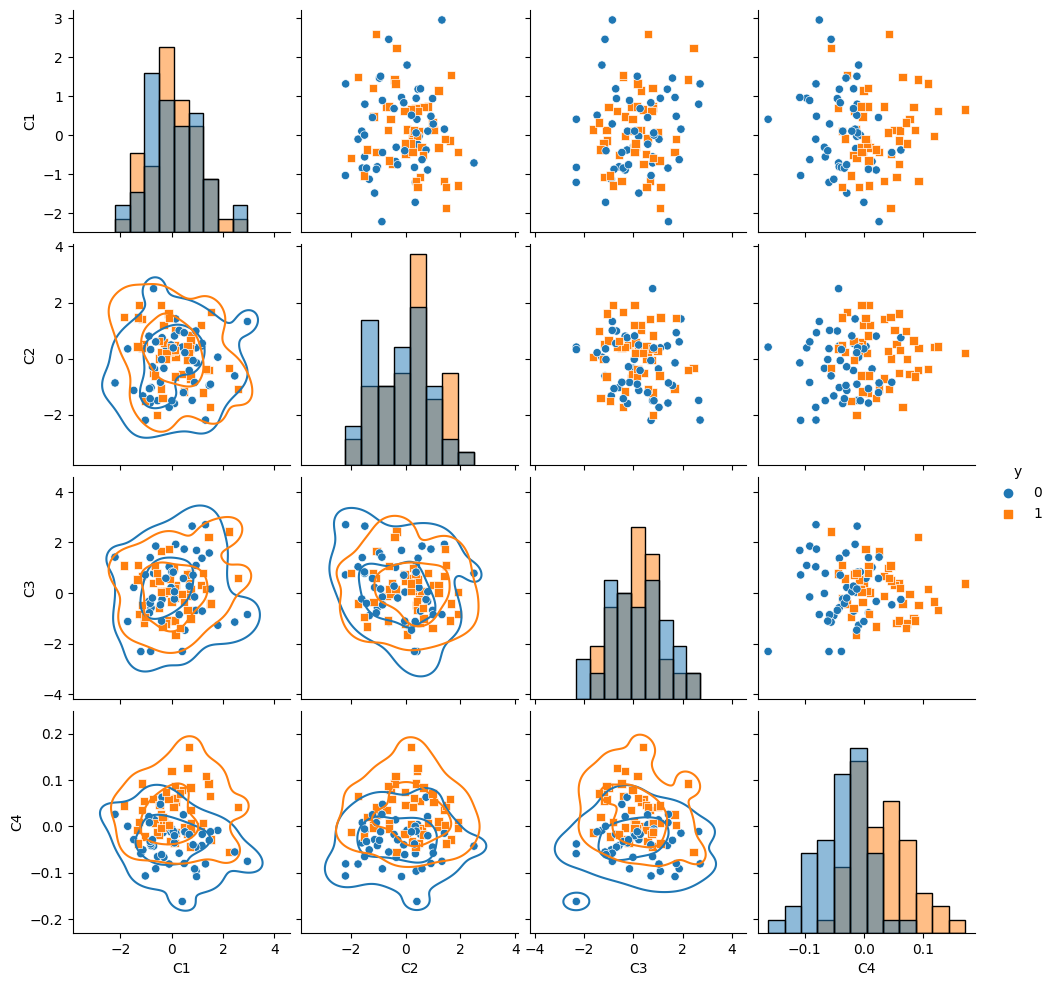

In [136]:
X, y = datasets.make_classification()
data = pd.DataFrame( {"C1":X[:,3] , "C2":X[:,1] ,"C3":X[:,6], "C4":X[:,0] ,'y': y } )
S = sbn.pairplot(data , hue='y' , diag_kind='hist',
              markers=['o' , 's' ],height=2.5 , corner=False)
S.map_lower(sbn.kdeplot , levels = 3 , color = ".4")

## CANCER DATA

In [3]:
cancer = datasets.load_breast_cancer()
print("Cancer keys: {}".format(cancer.keys()))
print("Cancer values: {}".format(cancer.data.shape))

print("\nSample counts per class:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print("\nFeatures names :\n{}".format(cancer.feature_names))

print("\nDate description :{}".format(cancer.DESCR))

Cancer keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Cancer values: (569, 30)

Sample counts per class:
{'malignant': 212, 'benign': 357}

Features names :
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Date description :.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attrib

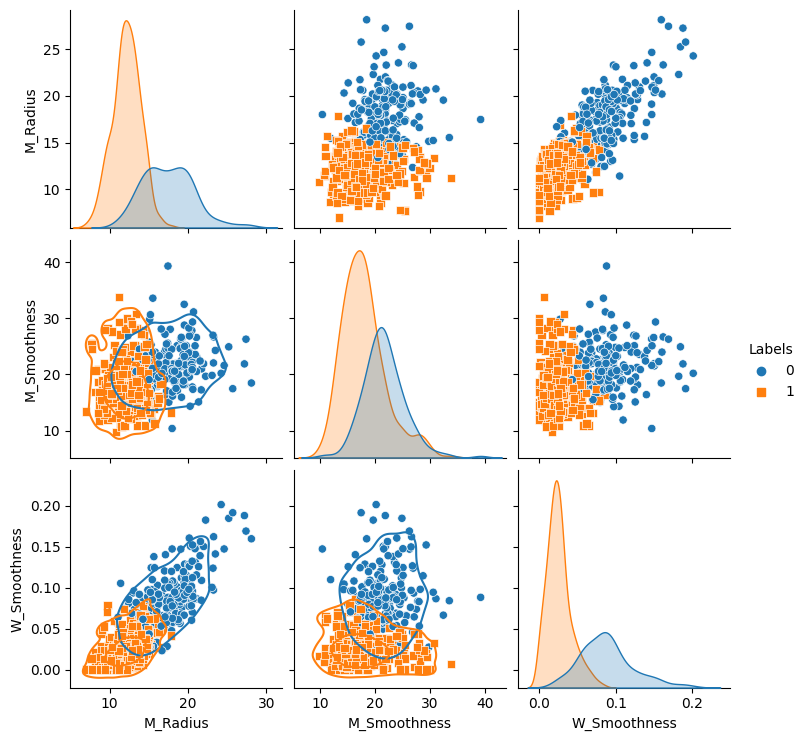

In [4]:
cancer_frame = pd.DataFrame({"M_Radius":cancer.data[: ,0] , "M_Smoothness":cancer.data[: ,1] ,
                             "W_Smoothness":cancer.data[: ,7] , "W_Concave":cancer.data[: ,8], 
                               "Labels" : cancer.target  })
col = ['M_Radius','M_Smoothness','Labels',"W_Smoothness"]
S = sbn.pairplot(cancer_frame[col] , hue='Labels', diag_kind='kde',
              markers=['o' , 's' ],height=2.5 , corner=False)
S.map_lower(sbn.kdeplot , levels = 3 , color = ".4")

## Prediction

In [139]:
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test = train_test_split(cancer.data , cancer.target , random_state= 0)
Clf = KNeighborsClassifier(n_neighbors=3)
Clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

## EVALUATION

In [140]:
print("Test set prediction: {}".format(Clf.predict(X_test)))
print("Test set accuracy: {:.2f}".format(Clf.score(X_test,y_test)))

y_pred = Clf.predict(X_test) 
print("Test by mean: {:.2f} %".format ( np.mean(y_pred == y_test )*100  )  )

Test set prediction: [0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]
Test set accuracy: 0.92
Test by mean: 92.31 %


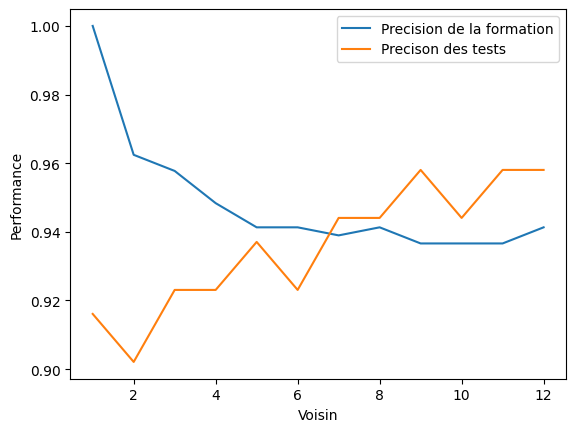

In [141]:
training_accuracy , test_accuracy = [], []
voisin_ = range(1,13)
for voisin in voisin_ :
    clf = KNeighborsClassifier(n_neighbors=voisin)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))

plt.plot(voisin_ , training_accuracy , label="Precision de la formation")
plt.plot(voisin_ , test_accuracy , label = "Precison des tests ")
plt.ylabel("Performance")
plt.xlabel("Voisin")
plt.legend() ;

## KNN-Regression

In [142]:
from sklearn.neighbors import KNeighborsRegressor
X_train,X_test,y_train,y_test = train_test_split(cancer.data , cancer.target , random_state= 0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

### Evaluation

In [143]:
print("Test set prediction: {}".format(reg.predict(X_test)))
print("Test set accuracy: {:.2f}".format(reg.score(X_test,y_test)))

y_pred = reg.predict(X_test) 
print("R^2 or coefficient of derterminantion: {:.2f} ".format ( np.mean(y_pred == y_test )  )  , color = 'blue')
training_accuracy , test_accuracy = [], []
voisin_ = range(1,13)


Test set prediction: [0.33333333 1.         1.         0.33333333 1.         1.
 1.         1.         1.         1.         0.33333333 0.66666667
 1.         0.33333333 0.33333333 0.         1.         0.
 0.         0.         0.33333333 0.33333333 1.         1.
 0.         0.66666667 1.         1.         1.         0.
 1.         0.         1.         0.         1.         0.33333333
 1.         0.         1.         0.         0.33333333 1.
 0.         1.         0.33333333 0.         1.         1.
 1.         0.         0.         1.         0.         1.
 1.         1.         1.         1.         1.         0.
 0.         0.         1.         1.         0.         0.66666667
 0.         0.         0.         1.         1.         0.
 1.         1.         0.         1.         1.         1.
 1.         1.         0.         0.         0.         1.
 0.         1.         1.         1.         0.         0.
 1.         0.         0.66666667 0.66666667 1.         1.
 0.        

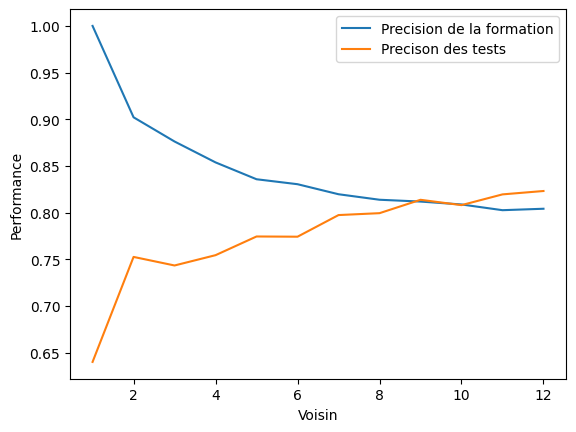

In [144]:

for voisin in voisin_ :
    reg = KNeighborsRegressor(n_neighbors=voisin)
    reg.fit(X_train,y_train)
    training_accuracy.append(reg.score(X_train,y_train))
    test_accuracy.append(reg.score(X_test,y_test))

plt.plot(voisin_ , training_accuracy , label="Precision de la formation")
plt.plot(voisin_ , test_accuracy , label = "Precison des tests ")
plt.ylabel("Performance")
plt.xlabel("Voisin")
plt.legend() ;